# Using Git for version control and changelog
by: Simen Svenkerud

## What is Git

*"Git is a free and open source distributed version control system designed to handle everything from small to very large projects with speed and efficiency."*

* **Control System**: This basically means that Git is a content tracker. So Git can be used to store content — it is mostly used to store code due to the other features it provides.

* **Version Control System**: The code which is stored in Git keeps changing as more code is added. Also, many developers can add code in parallel. So Version Control System helps in handling this by maintaining a history of what changes have happened. Also, Git provides features like branches and merges, which I will be covering later.

* **Distributed Version Control System**: Git has a remote repository which is stored in a server and a local repository which is stored in the computer of each developer. This means that the code is not just stored in a central server, but the full copy of the code is present in all the developers’ computers. Git is a Distributed Version Control System since the code is present in every developer’s computer. 

## Why use Git 

Real life projects generally have multiple developers working in parallel. So a version control system like Git is needed to ensure there are no code conflicts between the developers. Further reasons include:

### Safety
It’s obvious that with regular checkpoints, your work is more safe since you can hit the “undo” button when you go down dead ends. But there’s some related benefits that are perhaps not as obvious. The first is that you’re likely to also be syncing with a remote git server, like GitHub, so your work is backed up on a different machine. By using version control, you’ve automatically gained the benefit of backing up your work. That may not matter when everything is working well, but it will matter a great deal when you spill coffee on your laptop.

Second, the additional safety leads to a greater willingness to experiment. Instead of modifying a function directly, how many times have you copied/pasted it, added “_v2” to the name, and then modified it, just in case you might want to revert back? This is poor man’s version control, and it results in a mess. With checkpoints, you’re free to make bold changes without worry because you can always revert. Dead ends can be deleted, breakthroughs can be merged, and potentially useful tangents can just sit on the shelf.

### Clarity
When you are free to remove code that isn’t relevant to the particular task at hand, your code becomes more focused and clear. If the new model you’re currently testing doesn’t use that dead-end feature engineering code block, then delete it. This avoids the growth of a big web of incomprehensible code that emerges from experimentation in an environment of uncertainty about the end result.

### Repeatability
When you have code spread across multiple copies of Jupyter notebooks that need to be run in a very particular order to produce the model, then you have a repeatability problem. While it’s probably a bad idea to use Jupyter notebooks for anything except early experimentation, using version control to keep your code concise/clean reduces the risk and makes it easier to port into a proper module. Future You or Future Teammate will be very happy that there’s exactly one data pipeline and one model build.

## Getting started

We will walk thrugh how to set up and use git in your work process. All directly Git related comands start with **"git"**. 
It is important to note that while there are graphical interfaces for using git, these are mostly third party or attached to remote repositories. Git itself is primarily a comandline tool. For the sake of this notebook we will focus on the comandline version.

### First time set up
The first thing you need to do is to initiate a git repository. That is to say tell git that you want the content of this folder to be tracked. Navigate to the folder in question and run

In [ ]:
git init

This will tell git that you now want to track everything that happens in this diretory and all that are below it. I recommend doing this as soon as you are starting the project as this will provide you with a full history on how your project evolves. 

It will also create the **"Master"** branch. We will discuss the master branch and branches in general in a little moment in more detail later, but for now suffice to sat that it is the endproduct branch. 

If you start using git partway thrught the project you will already have code inside your directory. In this case w need to perform an initial commit, to add these files to our tracking.

### Using Git/ Git commands
#### Git status
If at any point you are wondering if you have captured all the files in your directroy, or if there are uncommited changes you can always type:

In [12]:
git status

SyntaxError: invalid syntax (<ipython-input-12-31fea9c68626>, line 1)

This will bring up an overview of the files that are tracked by git

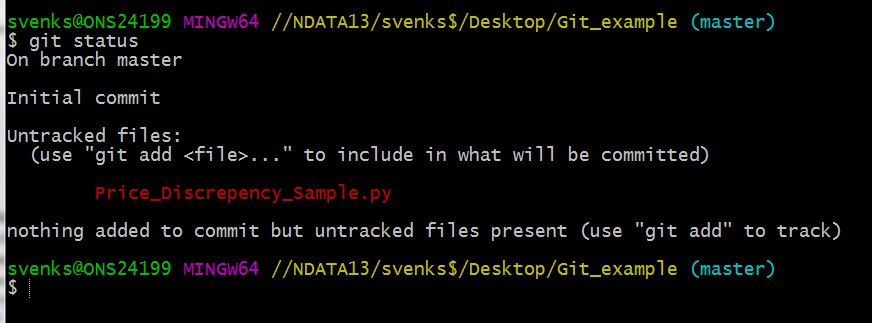

Files writen red are untracked and will not be backed up. Files written in red are unchanghed 

#### git add

Git opperates with a two tiered commiting system, where you first declare the files that you want to commit with the same message, this is called *"staging"* and is done with:

In [ ]:
git add <filepath>
git add . # will stage all changed files simmultanitously

#### git commit
Now we need to commit the files and explain what we have done. We will cover good commit messages further down, the focus now will be on the comit itself. When you commit your changes, all the files that you have in your staging are will be given a message and linked in a checkpoint. Think of it like saving your word document.

In [ ]:
git commit

Doing this will open up a text editor where you type your change message.

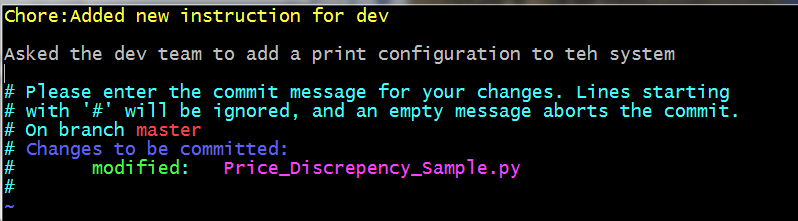

After typing your message you press [esc]->[:]->"wq"->[enter]
Having commited your changes you get a summary of your results

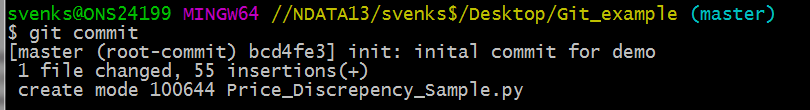

There is an option to complete a commit without opening the edditor, however if you want more content rich messages this is not adviced.

In [ ]:
git commit -m "<message>"

Sometimes while writing up the commit message you realise that you have made an error  when writing up, that is no problem, you cna go back and ammend your last commit message simply by typing:

In [ ]:
git commit --amend

And then follow up with your corrected message.

Depending on what text editor you use, writing the message can be a bit clunky. I personaly recoment using Nano, by default you use Vim. the above editor is vim. If you want to switch what text editor you use type in:

In [ ]:
git config --global core.editor <editorOfChoice>

#### git log
Having started your changelog you might want to inspect what changes and the changelog of your project.
The git comand for this is 

In [ ]:
git log

typing this in the comand line gives you a console print out of all the commits that have been performed in reverse chronological order.

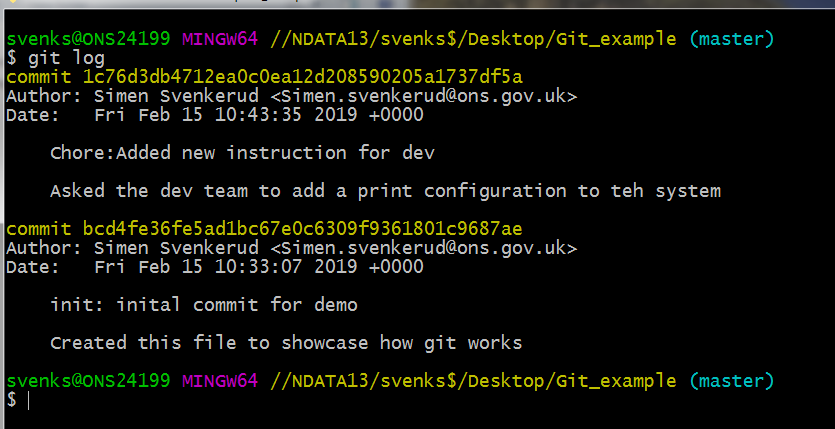

This printout also tels you who did the change, and when it was commited.

## Branches

Up until this point we have been using a single branch **'Master'** but what is a branch? 
A Branch is a collection of checkpoints (commits) that opperate independently ofeachother. these can later be combined (Merged) or left independed depending on your use.

Multiple branches are needed to support multiple parallel developments. Refer the image below to see how branches work.

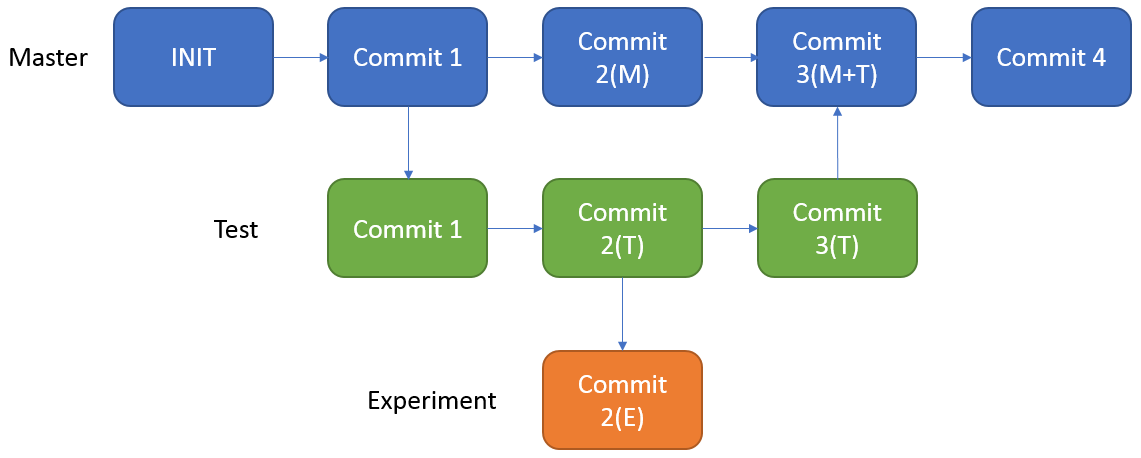

Initially, INIT and commit 1 were done in the master branch. 
After commit 1 a new Branch called as “Test” is created, and commit 2 and commit 3 are added to the test branch.

At the same time, a different commit 2 and commit 3 are added to the master branch. Here we can see that after Commit 3, two parallel developments are being done in 2 separate branches.

The Test Branch and the Master Branch have diverged here and have different code — the code from Test Branch can be merged with the Master branch using git merge in commit 3. This will be covered later.

We also see that at Commit 2, a third branch was created to perform an experiment. This experiment was unfruitfull an the branch is abandond. It can later be deleted, left as it is, or used to run the same experiment again if the underlying data is at fault.

### Creating and using branches in Git

#### git branch
When you want to create a new branch you simply type:

In [ ]:
git branch <branchName>

If you want to look at a list of existing brances you type:

In [ ]:
git branch

You are still on the **'Master'** branch. in order to switch branch you actively need to checkout your new branch.

In [ ]:
git checkout <branchName>

By doung this all the files inn your directory change to aligne with the latest commit in this branch.

While working on this banch your code now diverges from the code that everyone else has. And unless it is commited nobody else can see what you are doing. 

#### git merge
By the time we come to Commit 3(T) the test branc is ahead of the Master branch by two commits. As long as noone has changed the same code as you on the Master branch you can easily combine them again. This combining is called **'merging'**

First of go to the branc you want to merge into. In this case **'Master'**

In [ ]:
git checkout <TargetBranch>

Then run the merge request on the branch you want to merge in. In this case **'Test'**

In [ ]:
git merge <BranchYouWantToMerge>

Your two branches shouuld now be combined into one and the changes to the cod that you have made in the **Test** branch are migrated to the **Master** branch along with the commit history, giving you a colpleate changelog. 

### Merge conflicts

In this example there was no conflict between the codes in the two branches, alowing us to merge without any conflict. In  reality there will be instances of conflict between the two brances, and conflict handeling is an important aspect of version controll. We will cover merge conflicts in greater detail seperatly. 

Say you and a friend have both made changes to the same file at the same time. When you pull your friend’s changes, git will often be able to combine them without any problem.

You’ll get a message like:

In [ ]:
Auto-merging README.md
CONFLICT (content): Merge conflict in README.md
Automatic merge failed; fix conflicts and then commit the result.

If you open the offending file in a text editor, you’ll find an indication of the bits that are different, something like this:

In [ ]:
<<<<<<< HEAD
A line in my file.
=======
A line in my friend's file
>>>>>>> 031389f2cd2acde08e32f0beb084b2f7c3257fff

Edit the bits from <<<<<<< to >>>>>>>, to make the file just as you want it.

Then do:

In [ ]:
git add .
git commit
git push

## How to revert back in time

One of the large benefits of using Git (or any VCS) is that you can safly experiment as you always can go back to an erlier version. Git is an extremly flexible framework and you can pretty much do whatever you want, and as such it is important to ceep in mind what you do not to delete something you will want later.

### Temporarily switch to a different commit
If you want to temporarily go back to it, fool around, then come back to where you are, all you have to do is check out the desired commit:

In [ ]:
# This will detach your HEAD, that is, leave you with no branch checked out:
git checkout <commitHash>

Or if you want to make commits while you're there, go ahead and make a new branch while you're at it:

In [ ]:
git checkout -b old-state <commitHash>

To go back to where you were, just check out the branch you were on again. (If you've made changes, as always when switching branches, you'll have to deal with them as appropriate. You could reset to throw them away; you could stash, checkout, stash pop to take them with you; you could commit them to a branch there if you want a branch there.)

### Hard delete unpublished commits

If, on the other hand, you want to really get rid of everything you've done since then, there are two possibilities. One, if you haven't published any of these commits, simply reset:

In [ ]:
# This will destroy any local modifications.
# Don't do it if you have uncommitted work you want to keep.
git reset --hard <commitHash>

# Alternatively, if there's work to keep:
git stash
git reset --hard <commitHash>
git stash pop
# This saves the modifications, then reapplies that patch after resetting.
# You could get merge conflicts, if you've modified things which were
# changed since the commit you reset to.

If you mess up, you've already thrown away your local changes, but you can at least get back to where you were before by resetting again.

### Undo published commits with new commits

On the other hand, if you've published the work, you probably don't want to reset the branch, since that's effectively rewriting history. In that case, you could indeed revert the commits. With Git, revert has a very specific meaning: create a commit with the reverse patch to cancel it out. This way you don't rewrite any history.

In [ ]:
# This will create three separate revert commits:
git revert a867b4af 25eee4ca 0766c053

# It also takes ranges. This will revert the last two commits:
git revert HEAD~2..HEAD

#Similarly, you can revert a range of commits using commit hashes:
git revert a867b4af..0766c053 

# Reverting a merge commit
git revert -m 1 <merge_commit_sha>

# To get just one, you could use `rebase -i` to squash them afterwards
# Or, you could do it manually (be sure to do this at top level of the repo)
# get your index and work tree into the desired state, without changing HEAD:
git checkout 0d1d7fc32 .

# Then commit. Be sure and write a good message describing what you just did
git commit

## Remote repositories

Until now, we have been working only in the local repository. Each developer will work in their local repository but eventually, they will push the code into a remote repository. Once the code is in the remote repository, other developers can see and modify that code.

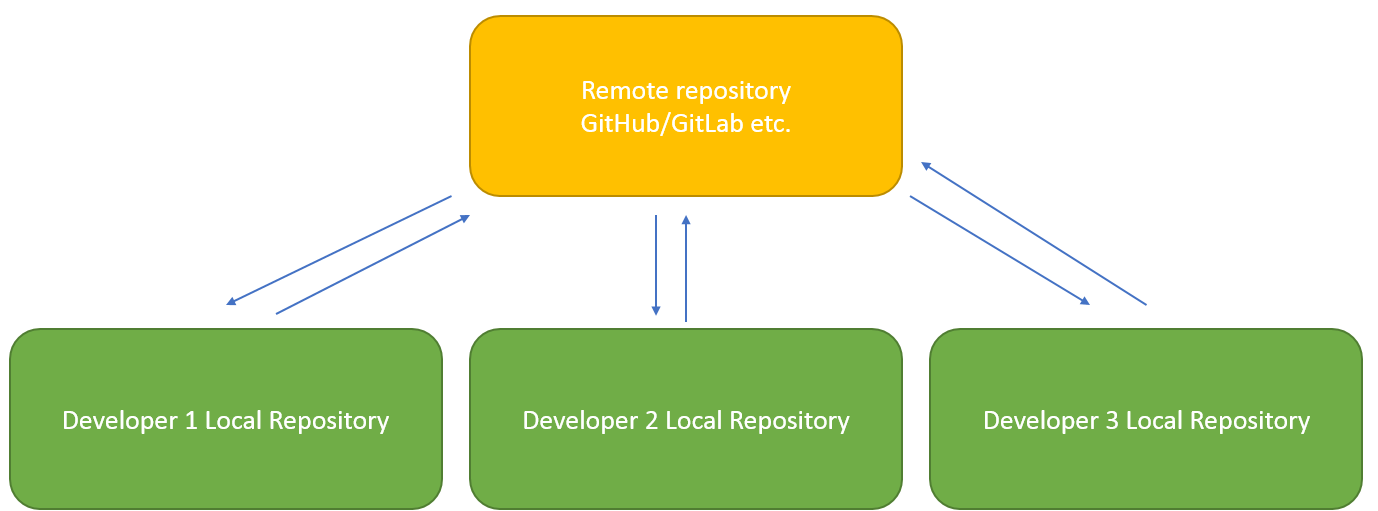

### GitHub

For this example we will be using GitHub for the remote repository.
However there are many differnet repositories available, and often corporations will have theri own scervices.

GitHub is an open accsess open source repository where anyone can store their code and where anyone can accsess it, copy, and or colaborate on it. 

Go to https://github.com/ and create an account.

After registering in the GitHub homepage, click on Start a Project to create a new Git repository. Give the repository a name and click “Create Repository”

Give the name as git-demo.

This will create a remote repository in GitHub, and when you open the repository.

### Linking yout local repository to the remote one

In order to point your local repositoru to the remote one you need to copy the link in the picture bellow

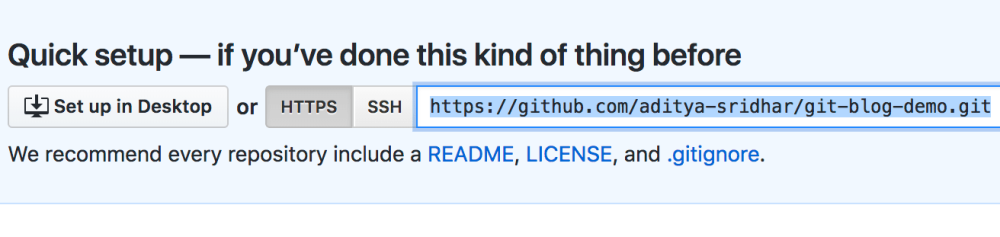

Next type: 

In [ ]:
git remote add origin <repositoryURL>

Next you will be asked to authenticate yourself with your username and password. It is worth noting that most comandlines do not give any indication of your typing when entering your password, so be carefull while typing.

#### git push
Even after commiting your changes and linking your repository to a remot location, your changes still are not visible to others. Infact everything you do is only ever sotred on your local computer until you **'push'** the changes to the remote. In order to push your chages you simply type:

In [ ]:
git push -u origin <branchName>

Your changes are now available to everyone on the project.

#### git pull
Simmilar to when you had to push your code for others to see it, you need to **'pull'** in order for you to see the changes others have done. 

In [ ]:
git pull origin <BranchYouWantToUpdate>

You can choose a spessific branch to update by giving a branch name.
Or perform a complete update by not specifying any branch.

**!note: Keep in mind that when you pull in changes, these are not automatically commited to your repository!** 

It is good practice to have a compleatly commited branch before pulling, and then commiting again before you carry on working, alowing your own commits to remain appropriate in size and scope. 

#### git clone
In some cases you are joining the work on an existing project. In this case rather than starting from scratch building up your repository you simply *"clone/copy"* an exisiting repository. This is as simple as pulling your updates. Simply type:

In [ ]:
git clone <URLofRepository>

### Tags
Each commit is assigned a “hash tag” which has a unique sequence of letters and numbers, like 35bdfghnh54kj32gzsh4kj5ud5ghsga6. When you refer to these hash tags, you can just use an initial substring, like 35bdf, that is unique to your repository.

to tag particular commits by the version number of the package. Then you can use your assigned tag in place of the less memorable hash tag.

To assign a tag, use something like

In [ ]:
git tag -a -m "Tagging version 1.28-5" 1.28-5

To push the tags to github, you need to use

In [ ]:
git push --tags

To delete a tag, use

In [ ]:
git tag -d 1.28-5

and then you need to remove the tag from github

In [ ]:
git push origin :refs/tags/1.28-5

## Writing good commit messages

Here is the guideline for writing a full git commit.
* A subject which contains the title of the git commit. This should be limited to 50 characters and should be separated from the rest of the commit with a blank line.
* Explanatory text explaining what has been changed and why the change was necessary. Write in the imperative mood e.g. “Fix bug causing outage” rather than “Fixed bug causing outage”.

### A commit message should answer three primary questions;
* Why is this change necessary?
* How does this commit address the issue?
* What effects does this change have?

#### Example
Capitalized, short (50 chars or less) summary

More detailed explanatory text, if necessary.  Wrap it to about 72
characters or so.  In some contexts, the first line is treated as the
subject of an email and the rest of the text as the body.  The blank
line separating the summary from the body is critical (unless you omit
the body entirely); tools like rebase can get confused if you run the
two together.

#### Tips
Write your commit message in the imperative: "Fix bug" and not "Fixed bug"
 or "Fixes bug."  This convention matches up with commit messages generated
by commands like git merge and git revert.

Further paragraphs come after blank lines.

- Bullet points are okay

- Typically a hyphen or asterisk is used for the bullet, followed by a single space, with blank lines in between, but conventions vary here

- Use a hanging indent

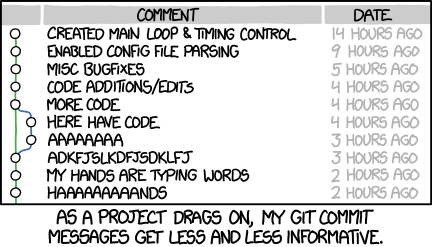

A proper, well written git log is an important indicator for how well thought out a project is.

Proper commit messages will make it easy to understand why a change has been made at a particular time. With this, maintainers of a project will easily be able to make changes decades later because they understand the code.

### Commit types

When writing commit messages it is good practice to start the subject with a *'Type'* denominating what has been done in the change. Bellow are examples of some types. this is by no means an exhaustive list, and feel free to add onec that match your workflow.

* feat: (new feature)
* fix: (bug fix)
* docs: (changes to documentation)
* style: (formatting, missing semi colons, etc; no code change)
* refactor: (refactoring production code)
* test: (adding missing tests, refactoring tests; no production code change)
* chore: (updating grunt tasks etc; no production code change)
* qa: (running a qa investigation, remember results)
* invest: (investigating a spessific feature or bug, remember results)
* new: (new scripts, or builds started)

## Commit logs

It is only natural to want to keep track of the changes that have been performed. and it id for this purpose we have the log. 

We briefly touched on the **'git log'** command within the console. You can however choose to export the change log to a text file or more commonly a .log file. for readability we provide the pretty comand and the format *'medium'* giving us a print out:


Commit:

Author:

Date:   

    title line
    
    full message
    
    
This file will be stored at the root location unless you specify the location of the file

In [ ]:
git log --pretty=medium >log.log

## Settings for git

When working with git you might want to change som eof the settings. this Is done via teh **'git config'** command. Bellow are a series of usefull settings to keep in mind.

In [ ]:
git config --global user.name <YourName>         # Set your username
git config --global user.email <YourEmail>       # Set your email

git config --global color.ui true                # Allow git to use color coded output in the console
git config --global core.editor nano             # Set Nano to be your default text editor



## .gitignore

When working on larger scale projects there are often a lot of secondary files generated, such as: 

* figures 
* reports 
* log files etc. 

These are examples of files that you want your git repository to ignore. 
They clutter your repository and some files might include files that contain sensitive data.

In order to make life easy and to prevent accsidentally commiting sensitive files, git recognises a fileexteniton **'.gitignore'** as an templat that eny file matching one of the scripts within should not be committed.

Bellow are examples, but by no means an exhaustive list.

In [ ]:
*~
.*~
.DS_Store
.log
.parquet
.pickel
.png

If you have a repeating set of file extensions that you want to ignore, you can make a global .gitignore file and make it global by typing the command:

In [ ]:
git config --global core.excludesfile <filePathPtoIgnoreFile>

## Further  Reading 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4945047/ # Using Git within a research setting

https://git-scm.com/book/en/v2 # e-book on using Git

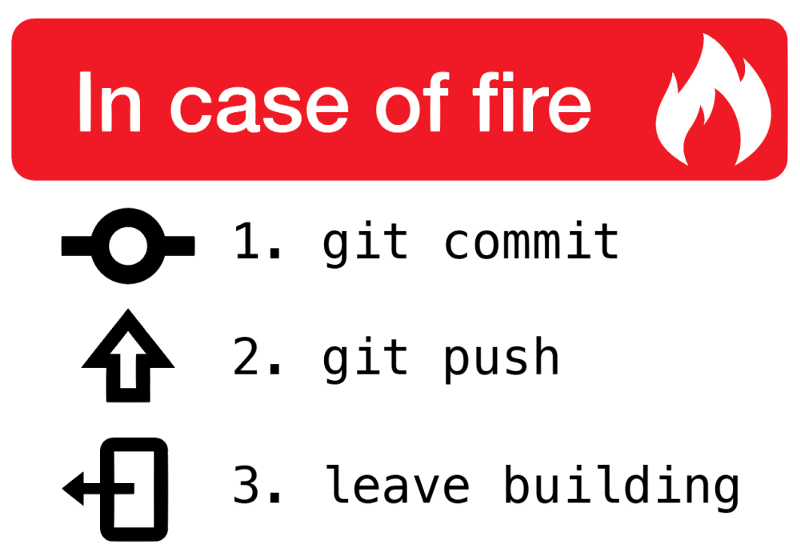